In [27]:
import numpy as np
np.random.seed(42)
from sklearn import datasets

### Dataset preparation

In [28]:
iris = datasets.load_iris() # Iris wird im Dataset von sklearn mitgeliefert

x = iris.data[:, :2] # [:, [0, 1]] --> [Jede Zeile, bis nicht einschließlich Spalte 2]
y = iris.target

class_names = iris.target_names
discription = iris.DESCR

In [29]:
#print(f"class_names:\n{class_names}")
#print(f"discription:\n{discription}")

In [30]:
#print(f"x shape:\n{x.shape}")
#print(f"y shape:\n{y.shape}")

#print(f"x:\n{x}")
#print(f"y:\n{y}")

### Dataset Split

In [31]:
num_samples = x.shape[0]
num_features = x.shape[1]
num_classes = y.shape[0]

print(f"num_samples: {num_samples}")
print(f"num_features: {num_features}")
print(f"num_classes: {num_classes}")

num_samples: 150
num_features: 2
num_classes: 150


In [32]:
test_size = num_samples // 3 # // Bedeutet Integer-Division. Ansonsten liefert / immer einen Float. Wir brauchen hier aber Integer
random_idxs = np.random.permutation(num_samples) # es wird eine zufällige Permutation der Indizes durchgeführt
# Eine Variation (von lateinisch variatio „Veränderung“) oder geordnete Stichprobe ist in der Kombinatorik eine Auswahl von Objekten 
# aus einer Menge in einer bestimmten Reihenfolge.
print(random_idxs)

x_train = x[random_idxs[:-test_size]] # Jede Index, bis ausschließlich "Letzter-test_size", also [0:99]
y_train = y[random_idxs[:-test_size]]

x_test = x[random_idxs[-test_size:]] # Indizes [100:149]
y_test = y[random_idxs[-test_size:]]

[ 73  18 118  78  76  31  64 141  68  82 110  12  36   9  19  56 104  69
  55 132  29 127  26 128 131 145 108 143  45  30  22  15  65  11  42 146
  51  27   4  32 142  85  86  16  10  81 133 137  75 109  96 105  66   0
 122  67  28  40  44  60 123  24  25  23  94  39  95 117  47  97 113  33
 138 101  62  84 148  53   5  93 111  49  35  80  77  34 114   7  43  70
  98 120  83 134 135  89   8  13 119 125   3  17  38  72 136   6 112 100
   2  63  54 126  50 115  46 139  61 147  79  59  91  41  58  90  48  88
 107 124  21  57 144 129  37 140   1  52 130 103  99 116  87  74 121 149
  20  71 106  14  92 102]


In [33]:
#print(f"x_train shape:\n{x_train.shape}")
#print(f"y_train shape:\n{y_train.shape}")

#print(f"x_test shape:\n{x_test.shape}")
#print(f"y_test shape:\n{y_test.shape}")

### KNN Model

In [34]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy: {accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred:\n{y_pred}")

accuracy: 58.0%
y_pred:
[0 0 0 2 1 0 1 1 0 1 2 1 2 2 0 2 2 2 2 1 2 1 2 1 0 1 2 1 0 1 1 2 0 1 0 2 2
 2 1 2 2 2 1 2 0 1 1 0 2 2]


Eine Genauigkeit von 58% ist für 3 Klassen wirklich schlecht

### Try different hyperparameters
Hyperparameter sind die Stellschrauben, die man beim Modell vertrimmen kann. Hier wären das die n_neighbors und die weights (Gewichtung gegenüber der Nacharn. Je näher der Punkt, desto das Gewicht) Parameter.


In [35]:
n_neighbors = [n_neighbor for n_neighbor in range(1, 11)] # [1, 2, ..., 10]
weight_modes = ['uniform', 'distance']

# 10 x 2 = 20 Models
for n_neighbor in n_neighbors:
    for weight_mode in weight_modes:
        clf = KNeighborsClassifier(
            n_neighbors=n_neighbor,
            weights=weight_mode
        )
        clf.fit(x_train, y_train)
        accuracy = clf.score(x_test, y_test)
        print(f"Neighbors: {n_neighbor}  Weight: {weight_mode}  Score: {accuracy:.4}")

Neighbors: 1  Weight: uniform  Score: 0.68
Neighbors: 1  Weight: distance  Score: 0.68
Neighbors: 2  Weight: uniform  Score: 0.54
Neighbors: 2  Weight: distance  Score: 0.68
Neighbors: 3  Weight: uniform  Score: 0.58
Neighbors: 3  Weight: distance  Score: 0.56
Neighbors: 4  Weight: uniform  Score: 0.64
Neighbors: 4  Weight: distance  Score: 0.66
Neighbors: 5  Weight: uniform  Score: 0.68
Neighbors: 5  Weight: distance  Score: 0.62
Neighbors: 6  Weight: uniform  Score: 0.68
Neighbors: 6  Weight: distance  Score: 0.62
Neighbors: 7  Weight: uniform  Score: 0.72
Neighbors: 7  Weight: distance  Score: 0.66
Neighbors: 8  Weight: uniform  Score: 0.74
Neighbors: 8  Weight: distance  Score: 0.68
Neighbors: 9  Weight: uniform  Score: 0.74
Neighbors: 9  Weight: distance  Score: 0.72
Neighbors: 10  Weight: uniform  Score: 0.66
Neighbors: 10  Weight: distance  Score: 0.72


### Best KNN Model
Aus obiger Betrachtung gewinnt man die Info, dass die Hyperparameter n_neighbors = 8 und weights = uniform die beste Wahl ist.

In [36]:
clf = KNeighborsClassifier(
    n_neighbors=8,
    weights="uniform"
)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)
print(f"accuracy: {accuracy*100.0:.4}%")

y_pred = clf.predict(x_test)
print(f"y_pred:\n{y_pred}")

y_pred_proba = clf.predict_proba(x_test) # Liefert ein Output Array mit 50 (Test-Samples) x 3 (Klassen) Einträgen und enthält die Wahrscheinlichkeit,
# dass das Test-Sample zu Klasse xy passt. Zeile 4: 1 von 8 Nachbar, gehört zu Klasse 2 --> 12.5% und 7 von 8 Nachbarn gehören zu Klasse 3 --> 87.5% Wahrscheinlichkeit, 
# dass das Sample zu Klasse 3 gehört
print(f"y_pred_proba:\n{y_pred_proba}")

accuracy: 74.0%
y_pred:
[0 0 0 2 1 0 1 2 0 1 2 2 2 1 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 1 0 2 2
 2 1 2 2 2 1 1 0 1 0 0 1 2]
y_pred_proba:
[[1.    0.    0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.    0.125 0.875]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.625 0.375]
 [0.    0.375 0.625]
 [1.    0.    0.   ]
 [0.    0.5   0.5  ]
 [0.    0.125 0.875]
 [0.    0.375 0.625]
 [0.    0.375 0.625]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.375 0.625]
 [0.    0.625 0.375]
 [0.    0.375 0.625]
 [0.    0.625 0.375]
 [0.125 0.875 0.   ]
 [0.    0.625 0.375]
 [0.625 0.375 0.   ]
 [0.    0.5   0.5  ]
 [0.    0.875 0.125]
 [1.    0.    0.   ]
 [0.    0.875 0.125]
 [0.    0.125 0.875]
 [0.    0.375 0.625]
 [1.    0.    0.   ]
 [0.125 0.875 0.   ]
 [0.    0.375 0.625]
 [0.    0.25  0.75 ]
 [1.    0.    0.   ]
 [0.    0.5   0.5  ]
 [1.    0.    0.   ]
 [0.    0.375 0.625]
 [0.    0.125 0.875]
 [0.    0.125 0.875]
 [0.    0.625 0.375]
 [0.    0.375 0.625]
 [0.    0.25  0.75 

### Decision Border Plot
Wo liegt die Entscheidungsebene zum Trennen der Samples? Wo wird Sample xy Klasse yx zugewiesen?

In [37]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap_background = ListedColormap([
    '#FFAAAA',
    '#AAAAFF',
    '#AAFFAA'
])
cmap_points = [
    'red',
    'blue', 
    'green'
]

def make_meshgrid(x: np.ndarray, y: np.ndarray):
    x = np.arange(
        np.min(x) - 1, np.max(x) + 1, 0.01
    ) # [4.0, 4.01, 4.02, .... 8.0]
    y = np.arange(
        np.min(y) - 1, np.max(y) + 1, 0.01
    ) # [2.0, 2.01, 2.02, .... 4.5]
    xx, yy = np.meshgrid(x, y)
    return xx, yy

def plot_contours(
    ax: plt.Axes,
    clf: KNeighborsClassifier,
    xx: np.ndarray,
    yy: np.ndarray,
    **params
) -> None:
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = np.reshape(z, (xx.shape))
    ax.contourf(xx, yy, z, **params)

def plot_decision_border(
    clf: KNeighborsClassifier,
    x_train: np.ndarray,
    y_train: np.ndarray,
    x_test: np.ndarray,
    y_test: np.ndarray
) -> None:
    fig, ax = plt.subplots()
    X0 = x_train[:, 0]
    X1 = x_train[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(
        ax, clf, xx, yy, cmap=cmap_background, alpha=0.5
    )
    for idx, point in enumerate(x_train):
        plt.scatter(
            point[0], point[1],
            color=cmap_points[y_train[idx]],
            s=20.0, marker="o"
        )
    for idx, point in enumerate(x_test):
        plt.scatter(
            point[0], point[1],
            color=cmap_points[y_test[idx]],
            s=30.0, marker="*"
        )
    plt.show()

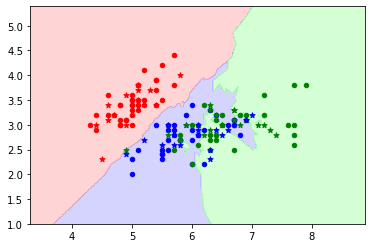

In [38]:
plot_decision_border(clf, x_train, y_train, x_test, y_test)

## Fragen

1. Was ist das Kreuzprodukt?
   1. Wozu brauche ich es?
2. Was sind xx und yy?
3. Meshgrid?